# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2383 Шмонова Наталья Александровна и Сериков Магжан. Вариант №11.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

# Основные теоретические положения


### Полиномиальное сглаживание

Полиномиальное сглаживание - метод аппроксимации дискретного сигнала полиномом методом наименьших квадратов. Для сигнала $x[n]$ сглаженное значение в точке $n$ вычисляется как:

$$\hat{x}[n] = \sum_{k=-M}^{M} h[k] \cdot x[n-k]$$

где $h[k]$ - коэффициенты нерекурсивного фильтра, $M$ определяет размер окна сглаживания: $N = 2M+1$ точек.

### Входной и выходной сигналы

Нерекурсивный фильтр (скользящее окно с весами $w_k$) реализуется через свёртку:

$$
y_n = \sum_{k=-h}^{h} w_k \, s_{n+k}
$$

где:  
- $s_n$ — входной дискретный сигнал,  
- $y_n$ — выходной сигнал после сглаживания,  
- $w_k$ — веса фильтра, зависящие от порядка полинома и размера окна $2h+1$,  
- $h = (N-1)/2$, где N — количество точек окна.

Через комплексную экспоненту входной сигнал можно представить как $s_n = e^{i w n}$, тогда выходной сигнал выражается через передаточную функцию:

$$
y_n = H(w) e^{i w n}, \quad H(w) = \sum_{k=-h}^{h} w_k e^{-i w k}
$$

### Передаточная функция нерекурсивного фильтра

Для нерекурсивного фильтра с коэффициентами $h[k]$ передаточная функция имеет вид:

$$H(z) = \sum_{k=-M}^{M} h[k] z^{-k}$$

Частотная характеристика получается подстановкой $z = e^{j\omega}$:

$$H(\omega) = \sum_{k=-M}^{M} h[k] e^{-j\omega k}$$

где $\omega = 2\pi f/f_s$ - нормированная частота, $f_s$ - частота дискретизации.

### Нормированная частотная характеристика

Для анализа свойств сглаживания используется нормированная частотная характеристика:

$$\hat{H}(f) = \frac{H(f)}{H(0)}$$

где $H(0) = \sum_{k=-M}^{M} h[k]$ - коэффициент усиления на нулевой частоте.

### Метод наименьших квадратов для полиномиальной аппроксимации

Для полинома степени $p$:

$$y(m) = a_0 + a_1 m + a_2 m^2 + \cdots + a_p m^p$$

где $m = -M, -M+1, ..., M-1, M$

Коэффициенты $a_i$ находятся минимизацией:

$$S = \sum_{m=-M}^{M} [y(m) - x(m)]^2 \rightarrow min$$


### Фильтры по формулам Спенсера

- Оптимизированные веса для окон 15 и 21 точек
- Передаточная функция строится аналогично, но коэффициенты рассчитаны для более равномерного подавления высоких частот
- Свойства:
  - Сильное подавление шумов при сохранении низкочастотной информации
  - Повышенная ровность амплитудной характеристики


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Для выполнения лабораторной работы подключим необходимые библиотеки.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Определим коэффициенты фильтра методом МНК.
Пусть дискретный сигнал $ s_k $ сглаживается на симметричном окне из $ N = 2h + 1 $ точек.

Сглаживание прямой линией означает аппроксимацию данных в окне полиномом первой степени:

$$y_k = P_1(k) = A + Bk, \quad \text{для } k = -h, \ldots, 0, \ldots, h.$$

Сглаженное значение в центральной точке ( k = 0 ) будет $y_0 = A$.

Для нахождения коэффициентов A и B, минимизируем сумму квадратов ошибок:

$$F(A, B) = \sum_{k=-h}^{h} (s_k - y_k)^2 = \sum_{k=-h}^{h} (s_k - A - Bk)^2 \rightarrow \min_{A,B}$$

Находим частные производные по A и B и приравниваем их к нулю (условие экстремума):

1. Частная производная по A:

$$\frac{\partial F}{\partial A} = \sum_{k=-h}^{h} 2(s_k - A - Bk)(-1) = 0$$

$$\sum_{k=-h}^{h} s_k - \sum_{k=-h}^{h} A - \sum_{k=-h}^{h} Bk = 0$$

$$\sum_{k=-h}^{h} s_k - A \sum_{k=-h}^{h} 1 - B \sum_{k=-h}^{h} k = 0$$

Учитывая, что $\sum_{k=-h}^{h} 1 = 2h + 1 = N$ и $\sum_{k=-h}^{h} k = 0$ (сумма симметричных чисел), получаем:

$$\sum_{k=-h}^{h} s_k - NA = 0 \Rightarrow A = \frac{1}{N} \sum_{k=-h}^{h} s_k.$$

2. Частная производная по B:

$$\frac{\partial F}{\partial B} = \sum_{k=-h}^{h} 2(s_k - A - Bk)(-k) = 0$$

$$\sum_{k=-h}^{h} ks_k - A \sum_{k=-h}^{h} k - B \sum_{k=-h}^{h} k^2 = 0$$

Снова, $\sum_{k=-h}^h k = 0$, поэтому второе слагаемое равно нулю:

$$\sum_{k=-h}^h k s_k - B \sum_{k=-h}^h k^2 = 0.$$

Сглаженное значение в центре окна — это $ y_0 = A $. Поскольку A не зависит от B, фильтр, соответствующий сглаженному значению, описывается формулой:

$$y_n = A = \sum_{k=-h}^h \left( \frac{1}{N} \right) s_{n+k} = \sum_{k=-h}^h h_k s_{n+k},$$

где $ s_{n+k} $ — отсчеты входного сигнала, а импульсная характеристика $ h_k $ нерекурсивного фильтра равна:

$$h_k = \frac{1}{N} = \frac{1}{2h + 1}, \quad \text{для } k = -h, \ldots, h.$$

Таким образом, фильтр сглаживания прямой линией в центральной точке является **фильтром скользящего среднего** с импульсной характеристикой:

$$h_k = \frac{1}{N} = \frac{1}{2h + 1}, \quad \text{для } k = -h, \ldots, h.$$



Для определения передаточной функции $ \tilde{H}(f) $ используем фундаментальное свойство линейной инвариантной во времени cистемы (ЛИС): если входной сигнал $ s_n $ является комплексной экспонентой (гармоникой) $ s_n = e^{i2\pi fn} $, то выходной сигнал $ y_n $ будет этой же гармоникой, умноженной на комплексный коэффициент $ \tilde{H}(f) $:

$$y_n = \tilde{H}(f)e^{i2\pi fn}$$

С другой стороны, выходной сигнал фильтра (свертка) описывается формулой:

$$y_n = \sum_{k=-h}^{h} h_k s_{n-k}$$

Подставим гармонический входной сигнал $ s_{n-k} = e^{i2\pi f(n-k)} $ в формулу свертки:

$$y_n = \sum_{k=-h}^{h} h_k e^{i2\pi f(n-k)}$$

$$= \sum_{k=-h}^{h} h_k e^{i2\pi fn} e^{-i2\pi fk} \quad \text{(разложение экспоненты)}$$

$$= e^{i2\pi fn} \sum_{k=-h}^{h} h_k e^{-i2\pi fk} \quad \text{(вынесение } e^{i2\pi fn}, \text{ не зависящего от } k\text{)}$$

Сравнивая этот результат с определением ЛИС $ y_n = \tilde{H}(f)e^{i2\pi fn} $, выводим формулу для передаточной функции:

$$\tilde{H}(f) = \sum_{k=-h}^{h} h_k e^{-i2\pi fk}$$

Подставляем $h_k = 1/N$:

$$\tilde{H}(f) = \sum_{k=-h}^{h} \frac{1}{N} e^{-i2\pi f k} = \frac{1}{N} \sum_{k=-h}^{h} e^{-i2\pi f k}.$$

Рассмотрим сумму $S = \sum_{k=-h}^{h} r^k$, где $r = e^{-i2\pi f}$. Это сумма геометрической прогрессии:

$$S = r^{-h} + r^{-h+1} + \cdots + r^h.$$

Вынесем $ r^{-h} $:

$$S = r^{-h}(1 + r + r^2 + \cdots + r^{2h}) = r^{-h} \frac{1 - r^{2h+1}}{1 - r}$$

Подставляем $ r = e^{-i2\pi f} $ и $ N = 2h + 1 $:

$$S = e^{i2\pi f h} \frac{1 - e^{-i2\pi f N}}{1 - e^{-i2\pi f}}$$

Далее, используем тождество:

$$1 - e^{-i\theta} = e^{-i\theta/2} (e^{i\theta/2} - e^{-i\theta/2}) = e^{-i\theta/2} (2i \sin(\theta/2)).$$

Применяем его к числителю $ c \theta = 2\pi f N $ и знаменателю $ c \theta = 2\pi f $:

$$S = e^{i2\pi f h} \frac{e^{-i\pi f N} (2i \sin(\pi f N))}{e^{-i\pi f} (2i \sin(\pi f))} = e^{i2\pi f h} e^{-i\pi f N} e^{i\pi f} \frac{\sin(\pi f N)}{\sin(\pi f)}.$$

Упрощаем экспоненты:

$$i2\pi f h - i\pi f N + i\pi f = i\pi f (2h - N + 1).$$

Поскольку $ N = 2h + 1 $, то $ 2h - N + 1 = 2h - (2h + 1) + 1 = 0 $. Таким образом, $$e^{i\pi f(2h - N + 1)} = e^0 = 1.$$  

Итоговая формула для передаточной функции:  

$$\tilde{H}(f) = \frac{1}{N} \frac{\sin(\pi f N)}{\sin(\pi f)}.$$

Амплитудно-частотная характеристика — это модуль передаточной функции:  

$$|\tilde{H}(f)| = \left| \frac{1}{N} \frac{\sin(\pi f N)}{\sin(\pi f)} \right| = \frac{1}{N} \left|\frac{\sin(\pi f N)}{\sin(\pi f)} \right|.$$

Подставим конкретные значения $ N $:

1. Окно 3 точки ($ N = 3, h = 1 $):

$$\tilde{H}_3(f) = \frac{1}{3} \frac{\sin(3\pi f)}{\sin(\pi f)}$$

2. Окно 5 точек ($ N = 5, h = 2 $):

$$\tilde{H}_5(f) = \frac{1}{5} \frac{\sin(5\pi f)}{\sin(\pi f)}$$

3. Окно 7 точек ($ N = 7, h = 3 $):

$$\tilde{H}_7(f) = \frac{1}{7} \frac{\sin(7\pi f)}{\sin(\pi f)}$$

4. Окно 9 точек ($ N = 9, h = 4 $):

$$\tilde{H}_9(f) = \frac{1}{9} \frac{\sin(9\pi f)}{\sin(\pi f)}$$

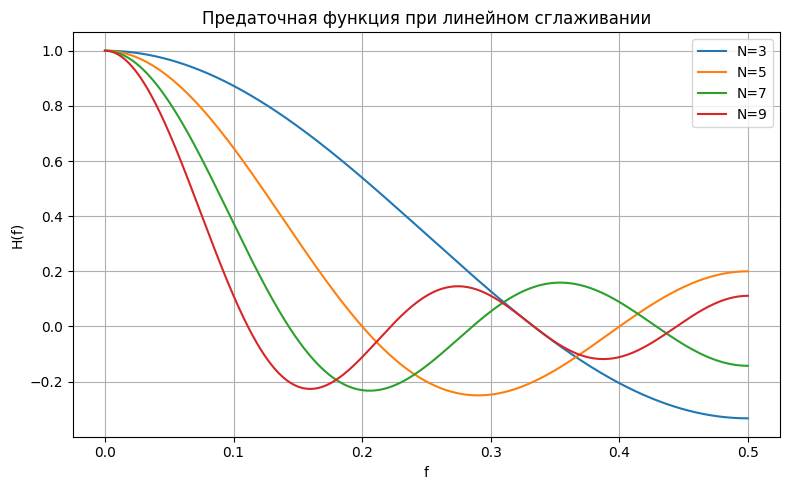

In [33]:
# Окна, которые нужно построить
Ns = [3, 5, 7, 9]
f = np.arange(0, 0.5, 0.0003)  # частота
eps = 1e-14  # маленькое число для защиты от деления на ноль

def H(f, N):
    """Амплитудная характеристика скользящего среднего длины N"""
    numer = np.sin(N * np.pi * f)
    denom = np.sin(np.pi * f)
    Hf = np.empty_like(f)
    small = np.abs(denom) < eps
    Hf[~small] = numer[~small] / (N * denom[~small])
    Hf[small] = 1.0  # предел при f->0
    return Hf

# Построение графиков
plt.figure(figsize=(8,5))
for N in Ns:
    plt.plot(f, H(f, N), label=f"N={N}")
plt.xlabel("f")
plt.ylabel("H(f)")
plt.title("Предаточная функция при линейном сглаживании")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Интерпретация частотных свойств передаточной функции при линейном сглаживании сигнала

1. **Амплитуда при частоте \( f = 0 \)**  
   Для всех фильтров линейного сглаживания выполняется  
   $$
   |\tilde{H}(0)| = 1
   $$  
   Это значит, что постоянная часть сигнала (его среднее значение) полностью сохраняется — фильтр не искажает уровень сигнала.

2. **Полоса пропускания**  
   - Чем больше число точек N, тем **уже полоса пропускания** фильтра.  
   - Для малых N (например, N = 3, 5) фильтр пропускает больше частот — сглаживание слабое.  
   - Для больших N (например, N = 7, 9) фильтр сильнее подавляет высокочастотные колебания, делая сигнал более плавным.

3. **Поведение на высоких частотах**  
   Когда частота f растёт, значение  $ |\tilde{H}(f)| $  уменьшается. Это означает, что фильтр хуже передаёт быстрые изменения сигнала.  
   Чем больше окно N, тем сильнее фильтр подавляет шумы, но тем “тяжелее” реагирует на резкие переходы.

4. **Сравнение фильтров с разным количеством точек**  
   - N = 3: слабое сглаживание, сохраняются мелкие детали.  
   - N = 5: сглаживание среднее, часть шумов подавляется.  
   - N = 7, 9: сильное сглаживание, фильтр хорошо убирает шум, но сглаживает и детали.

Линейное сглаживание приближает данные прямой линией и действует как фильтр, который сохраняет низкие частоты и постепенно ослабляет высокие.  
При увеличении количества точек N сигнал становится более гладким, шумы уменьшаются, но снижается точность передачи быстрых изменений.


## Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Пусть дискретный сигнал $s_k$ сглаживается на **симметричном окне** из $N = 2h + 1$ точек. Аппроксимация данных в окне полиномом второй степени:

$$
y_k = P_2(k) = A + Bk + Ck^2, \quad k=-h, \ldots, 0, \ldots, h
$$

Сглаженное значение в **центральной точке** (k=0):

$$
y_0 = A
$$

Минимизируем сумму квадратов ошибок:

$$
F(A,B,C) = \sum_{k=-h}^{h} (s_k - y_k)^2 = \sum_{k=-h}^{h} (s_k - A - Bk - Ck^2)^2 \rightarrow \min_{A,B,C}
$$

Находим точки экстремума, вычисляя частные производные по $A, B, C$:

Частная производная по A:

$$
\frac{\partial F}{\partial A} = \sum_{k=-h}^{h} 2(s_k - A - Bk - Ck^2)(-1) = 0
$$

Раскроем сумму:

$$
\sum_{k=-h}^{h} s_k - \sum_{k=-h}^{h} A - \sum_{k=-h}^{h} Bk - \sum_{k=-h}^{h} C k^2 = 0
$$

Учитываем симметрию окна:

$$
\sum_{k=-h}^{h} k = 0, \quad \sum_{k=-h}^{h} 1 = 2h+1 = N, \quad \sum_{k=-h}^{h} k^2 = \frac{h(h+1)(2h+1)}{3} = S_2
$$

Тогда получаем:

$$
N A + S_2 C = \sum_{k=-h}^{h} s_k
$$

Частная производная по B:

$$
\frac{\partial F}{\partial B} = \sum_{k=-h}^{h} 2(s_k - A - Bk - Ck^2)(-k) = 0
$$

Раскрываем:

$$
\sum_{k=-h}^{h} k s_k - A \sum_{k=-h}^{h} k - B \sum_{k=-h}^{h} k^2 - C \sum_{k=-h}^{h} k^3 = 0
$$

Симметрия окна даёт:

$$
\sum_{k=-h}^{h} k = 0, \quad \sum_{k=-h}^{h} k^3 = 0
$$

Остаётся:

$$
B S_2 = \sum_{k=-h}^{h} k s_k \quad \Rightarrow \quad B = \frac{\sum_{k=-h}^{h} k s_k}{S_2}
$$

Частная производная по C:

$$
\frac{\partial F}{\partial C} = \sum_{k=-h}^{h} 2(s_k - A - Bk - Ck^2)(-k^2) = 0
$$

Раскрываем:

$$
\sum_{k=-h}^{h} k^2 s_k - A \sum_{k=-h}^{h} k^2 - B \sum_{k=-h}^{h} k^3 - C \sum_{k=-h}^{h} k^4 = 0
$$

Симметрия окна:

$$
\sum_{k=-h}^{h} k^3 = 0, \quad \sum_{k=-h}^{h} k^4 = \frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} = S_4
$$

Следовательно:

$$
S_2 A + S_4 C = \sum_{k=-h}^{h} k^2 s_k
$$

Система для $A, B, C$:

$$
\begin{cases}
N A + S_2 C = \sum_{k=-h}^{h} s_k \\
B S_2 = \sum_{k=-h}^{h} k s_k \\
S_2 A + S_4 C = \sum_{k=-h}^{h} k^2 s_k
\end{cases}
$$

Решаем для $A$ (центральная точка):

$$
A = \frac{\sum_{k=-h}^{h} (5k^2 - 3h^2 - 3h + 1) s_k}{\frac{8h^3 + 12h^2 -2h -3}{3}}
$$


Сдвигая окно по сигналу $s_n$:

$$
y_n = A = \frac{3}{8h^3 + 12h^2 -2h -3} \sum_{k=n-h}^{n+h} (5(k-n)^2 - 3h^2 -3h +1) s_k
$$

**Импульсная характеристика** $h_k$:

$$
h_k = \frac{3}{8h^3 + 12h^2 -2h -3} (5k^2 -3h^2 -3h +1), \quad k=-h,\ldots,h
$$

Для гармонического входного сигнала $s_n = e^{i w n}$:

$$
y_n = \sum_{k=-h}^{h} h_k s_{n+k} = \sum_{k=-h}^{h} h_k e^{i w (n+k)} = e^{i w n} \sum_{k=-h}^{h} h_k e^{i w k} = H(w) e^{i w n}
$$

Следовательно, **передаточная функция**:

$$
H_{2h+1}(w) = \sum_{k=-h}^{h} h_k e^{i w k} = \frac{3}{8h^3 + 12h^2 -2h -3} \sum_{k=-h}^{h} (5k^2 -3h^2 -3h +1) e^{i w k}
$$

Симметрия позволяет переписать через косинусы:

$$
H_{2h+1}(w) = \frac{3}{8h^3 + 12h^2 -2h -3} \left[ -3h^2 -3h +1 + 2 \sum_{k=1}^{h} (5k^2 -3h^2 -3h +1) \cos(w k) \right]
$$

Переходим к нормализованной частоте $w = 2 \pi f$:

$$
\tilde{H}_{2h+1}(f) = \frac{3}{8h^3 + 12h^2 -2h -3} \left[ -3h^2 -3h +1 + 2 \sum_{k=1}^{h} (5k^2 -3h^2 -3h +1) \cos(2 \pi f k) \right]
$$



1. $N = 7 \Rightarrow h = 3$

$$ \tilde{H}_{7}(f) = \cfrac{1}{21}  \left( -7 + 2\displaystyle \sum_{k=1}^{k=3} (k^2 - 7) \cos(2 \pi f k) \right) $$

2. $N = 9 \Rightarrow h = 4$

$$ \tilde{H}_{9}(f) = \cfrac{1}{231}  \left( -59 + 2\displaystyle \sum_{k=1}^{k=4} (5k^2 + 59) \cos(2 \pi f k) \right) $$

3. $N = 11 \Rightarrow h = 5$

$$ \tilde{H}_{11}(f) = \cfrac{1}{429}  \left( -89 + 2\displaystyle \sum_{k=1}^{k=5} (5k^2 + 89) \cos(2 \pi f k) \right) $$

4. $N = 13 \Rightarrow h = 6$

$$ \tilde{H}_{13}(f) = \cfrac{1}{143}  \left( -25 + 2\displaystyle \sum_{k=1}^{k=6} (k^2 + 25) \cos(2 \pi f k) \right) $$

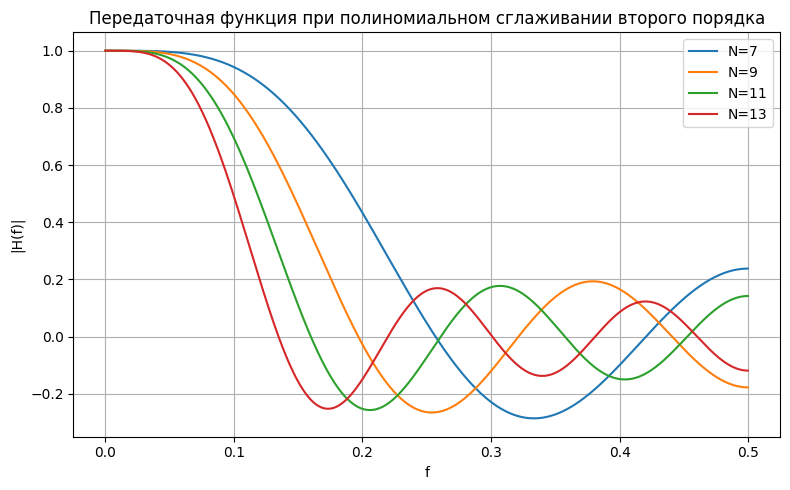

In [ ]:
# Размеры окон для фильтра 2-го порядка
Ns = [7, 9, 11, 13]
# частота
f = np.arange(0, 0.5, 0.0003)

def H_poly2(f, N):
    """ Амплитудная характеристика фильтра второго порядка длины N=2h+1 """
    h = (N - 1) // 2
    Hf = np.zeros_like(f)

    # Постоянный член передаточной функции
    a0 = -3*h**2 - 3*h + 1
    # Нормировочный коэффициент
    coef = 3 / (8*h**3 + 12*h**2 - 2*h - 3)

    # Вычисление амплитуды для каждой частоты f
    for i, fi in enumerate(f):
        cos_sum = np.sum([ (5*k**2 - 3*h**2 - 3*h + 1) * np.cos(2 * np.pi * fi * k)
                           for k in range(1, h+1)])
        Hf[i] = coef * (a0 + 2 * cos_sum)

    Hf = Hf / Hf[0]
    return Hf

# Построение графиков
plt.figure(figsize=(8,5))
for N in Ns:
    plt.plot(f, H_poly2(f, N), label=f"N={N}")
plt.xlabel("f")
plt.ylabel("|H(f)|")
plt.title("Передаточная функция при полиномиальном сглаживании второго порядка")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Интерпретация частотных свойств передаточных функций при сглаживании полиномом второй степени

1. **Амплитуда при частоте \( f = 0 \)**  
   Для всех фильтров выполняется нормировка:  
   $$
   |\tilde{H}(0)| = 1
   $$  
   Это означает, что постоянная (низкочастотная) составляющая сигнала сохраняется после сглаживания, то есть фильтр не изменяет общий уровень сигнала.

2. **Полоса пропускания**  
   - Чем больше окно \( N \), тем **уже полоса пропускания** фильтра.  
   - Для меньших окон (\( N = 7 \)) фильтр пропускает больший диапазон частот, обеспечивая меньшее сглаживание.  
   - Для больших окон (\( N = 13 \)) фильтр сильнее подавляет высокочастотные колебания, что делает сигнал более плавным, но менее детализированным.

3. **Поведение на высоких частотах**  
   При увеличении частоты \( f \) наблюдается уменьшение  
   $$
   |\tilde{H}(f)|
   $$  
   — фильтр ослабляет быстрые изменения и шум. При больших N это подавление становится более выраженным, а переход к нулевому уровню происходит плавнее.

4. **Боковые колебания**  
   После основной полосы пропускания на графиках видны небольшие колебания амплитуды.  
   Эти колебания уменьшаются по амплитуде при увеличении длины окна и не оказывают существенного влияния на качество сглаживания.

5. **Сравнение фильтров с разным количеством точек**  
   - \( N = 7 \): сглаживание слабое, частотный диапазон широкий, сохраняются детали.  
   - \( N = 9 \): сглаживание умеренное, шумы заметно уменьшаются.  
   - \( N = 11, 13 \): сглаживание сильное, высокие частоты подавляются почти полностью.  

Фильтры второго порядка эффективно устраняют шумы и колебания в сигнале, сохраняя при этом основную форму и тренд данных.  
Увеличение числа точек окна N делает фильтр более «медленным» и сглаживающим, но снижает способность передавать быстрые изменения в сигнале.


## Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Нерекурсивный фильтр 4-й степени описывается полиномом:

$$
y(t) = A + B t + C t^2 + D t^3 + E t^4
$$

где коэффициенты A, B, C, D, E определяются методом наименьших квадратов по окну из $2h + 1$ точек.

Сумма квадратов отклонений по \(2h+1\) точкам:

$$
F_{2h+1}(A, B, C, D, E) = \sum_{k=-h}^{h} \left(s_k - A - B k - C k^2 - D k^3 - E k^4\right)^2 \to \min
$$

Для минимизации берём частные производные по всем коэффициентам:

Берем частные производные

По A:

$$
\begin{aligned}
\frac{\partial F}{\partial A} &= \sum_{k=-h}^{h} 2(s_k - A - B k - C k^2 - D k^3 - E k^4)(-1) \\
&= -2 \sum_{k=-h}^{h} s_k + 2 (2h+1) A + 2 B \sum_{k=-h}^{h} k + 2 C \sum_{k=-h}^{h} k^2 + 2 D \sum_{k=-h}^{h} k^3 + 2 E \sum_{k=-h}^{h} k^4 = 0
\end{aligned}
$$

Используем симметрию окна $\sum k = \sum k^3 = 0$:

$$
(2h + 1) A + \frac{h(h+1)(2h+1)}{3} C + \frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} E = \sum_{k=-h}^{h} s_k
$$

По B:

$$
\frac{\partial F}{\partial B} = \sum_{k=-h}^{h} 2(s_k - A - B k - C k^2 - D k^3 - E k^4)(-k) = 0
$$

Суммируя и учитывая симметрию $\sum k = \sum k^3 = \sum k^5 = 0$:

$$
\frac{h(h+1)(2h+1)}{3} B + \frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} D = \sum_{k=-h}^{h} k s_k
$$

По C:

$$
\frac{\partial F}{\partial C} = \sum_{k=-h}^{h} 2(s_k - A - B k - C k^2 - D k^3 - E k^4)(-k^2) = 0
$$

После сокращений:

$$
\frac{h(h+1)(2h+1)}{3} A + \frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} C + \frac{h(h+1)(2h+1)(3h^4 + 6 h^3 -3h + 1)}{21} E = \sum_{k=-h}^{h} k^2 s_k
$$

По D:

$$
\frac{\partial F}{\partial D} = \sum_{k=-h}^{h} 2(s_k - A - B k - C k^2 - D k^3 - E k^4)(-k^3) = 0
$$

С учётом симметрии $\sum k^3 = \sum k^5 = \sum k^7 = 0$ получаем:

$$
\frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} B + \frac{h(h+1)(2h+1)(3h^4 + 6 h^3 -3h + 1)}{21} D = \sum_{k=-h}^{h} k^3 s_k
$$

По E:

$$
\frac{\partial F}{\partial E} = \sum_{k=-h}^{h} 2(s_k - A - B k - C k^2 - D k^3 - E k^4)(-k^4) = 0
$$

Сокращение с учётом симметрии:

$$
\frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} A + \frac{h(h+1)(2h+1)(3h^4 + 6 h^3 -3h + 1)}{21} C + \frac{10 h^8 + 45 h^7 + 60 h^6 -42 h^4 + 20 h^2 -3}{45} E = \sum_{k=-h}^{h} k^4 s_k
$$

Система нормальных уравнений для A, C, E упрощается для центрального значения $y_0 = A$:

$$
\begin{cases}
(2h + 1)A + \frac{h(h+1)(2h+1)}{3} C + \frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} E = \sum_{k=-h}^{h} s_k \\
\frac{h(h+1)(2h+1)}{3} A + \frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} C + \frac{h(h+1)(2h+1)(3h^4 + 6 h^3 -3h + 1)}{21} E = \sum_{k=-h}^{h} k^2 s_k \\
\frac{h(h+1)(2h+1)(3h^2 + 3h -1)}{15} A + \frac{h(h+1)(2h+1)(3h^4 + 6 h^3 -3h + 1)}{21} C + \frac{10 h^8 + 45 h^7 + 60 h^6 -42 h^4 + 20 h^2 -3}{45} E = \sum_{k=-h}^{h} k^4 s_k
\end{cases}
$$

Решая систему для A, получаем:

$$
A = \frac{\sum_{k=-h}^{h} s_k \left( 15h^4 + 30h^3 - 35h^2 - 50h + 12 - (70h^2 + 70h - 105) k^2 + 63 k^4 \right)}{\frac{128 h^5 + 320 h^4 - 320 h^3 - 800 h^2 + 72 h + 180}{15}}
$$

Центральное значение фильтра:

$$
y_0 = A
$$

Для входного сигнала $s_n = e^{i w n}$:

$$
y_n = A = \frac{15}{128 h^5 + 320 h^4 - 320 h^3 - 800 h^2 + 72 h + 180}
\sum_{k=-h}^{h} \left( 15h^4 + 30h^3 - 35h^2 - 50h + 12 - (70h^2 +70h -105) k^2 + 63 k^4 \right) e^{i w k}
$$

Используя формулу Эйлера:

$$
H_{2h+1}(w) = \frac{15}{128 h^5 + 320 h^4 - 320 h^3 - 800 h^2 + 72 h + 180}
\left[ (15h^4 + 30h^3 - 35h^2 - 50h + 12) + 2 \sum_{k=1}^{h} \left(15h^4 + 30h^3 - 35h^2 - 50h + 12 - (70h^2 +70h -105) k^2 + 63 k^4 \right) \cos(w k) \right]
$$

Для удобства анализа через нормированную частоту f:

$$
\tilde{H}_{2h+1}(f) = H_{2h+1}(2\pi f)
$$

1) Для 9 точек (h = 4)

$ \tilde{H}_{9}(f) = \cfrac{1}{180180}  \left(5012 + \displaystyle \sum_{k=1}^{k=4} (5012 - 1295k^2 + 63k^4) \cos(2 \pi f k) \right) $

2) Для 11 точек (h = 5)

$ \tilde{H}_{11}(f) = \cfrac{1}{540540} \left(12012 + \displaystyle \sum_{k=1}^{k=5} (12012 - 1995k^2 + 63k^4) \cos(2 \pi f k) \right) $

3) Для 13 точек (h = 6)

$ \tilde{H}_{13}(f) = \cfrac{1}{1312740}  \left(24372 + \displaystyle \sum_{k=1}^{k=6} (24372 - 2835k^2 + 63k^4) \cos(2 \pi f k) \right) $

4) Для 15 точек (h = 7)

$ \tilde{H}_{15}(f) = \cfrac{1}{2771340}  \left(44252 + \displaystyle \sum_{k=1}^{k=7} (44252 - 3815k^2 + 63k^4) \cos(2 \pi f k) \right) $


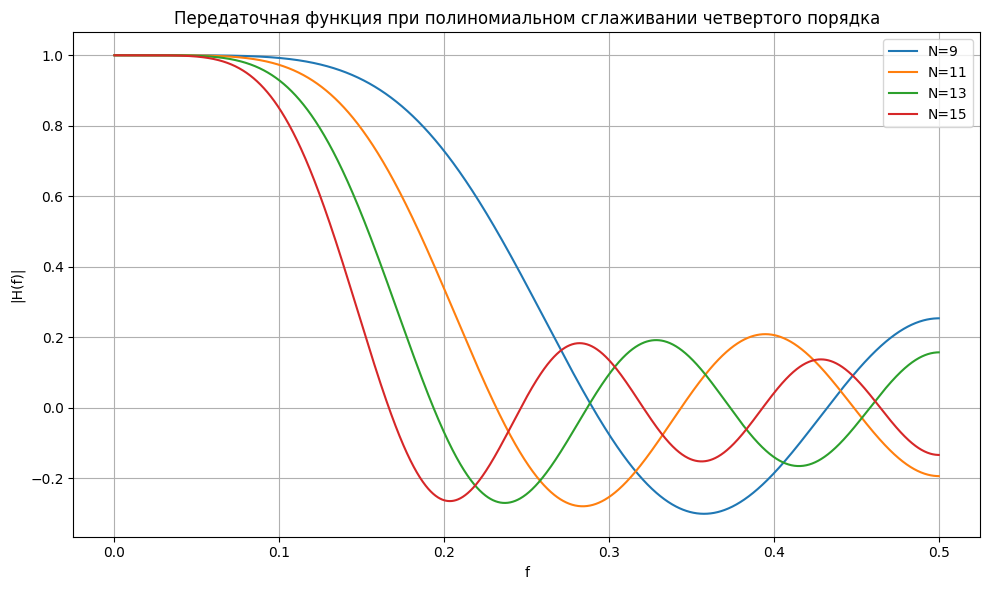

In [35]:
# Размеры окон
hs = [4, 5, 6, 7]
# частота
f = np.arange(0, 0.5, 0.0003)

# Передаточная функция 4-й степени
def H4(f, h):
    # Знаменатель
    den = 128*h**5 + 320*h**4 - 320*h**3 - 800*h**2 + 72*h + 180
    c0 = 15*h**4 + 30*h**3 - 35*h**2 - 50*h + 12
    cos_sum = np.zeros_like(f)
    for k in range(1, h+1):
        ck = c0 - (70*h**2 + 70*h - 105)*k**2 + 63*k**4
        cos_sum += ck * np.cos(2 * np.pi * f * k)
    Hf = (15/den) * (c0 + 2 * cos_sum)
    return Hf

# Построение графиков
plt.figure(figsize=(10,6))
for h in hs:
    N = 2*h + 1
    plt.plot(f, H4(f, h), label=f'N={N}')
plt.xlabel('f')
plt.ylabel('|H(f)|')
plt.title('Передаточная функция при полиномиальном сглаживании четвертого порядка')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Интерпретация частотных свойств передаточных функций при сглаживании полиномом четвертой степени

1. **Большие окна** (13, 15 точек) обеспечивают более сильное подавление высоких частот и плоскую амплитуду на низких частотах.  
   - Фильтр сглаживает сигнал эффективнее и шумы подавляются сильнее.

2. **Малые окна** (9, 11 точек) сохраняют более высокую чувствительность к быстрым изменениям сигнала, но хуже фильтруют шум.

3. **Основные характеристики передаточных функций**:  
   - Передаточные функции полиномиального сглаживания сохраняют основные характеристики — количество осцилляций связано с числом точек, симметричность относительно оси частот, максимум равный 1 при $f = 0$.  
   - При увеличении порядка полиномиального сглаживания функция дольше сохраняет значения, близкие к 1, в окрестности нулевой частоты. Это означает лучшее сохранение чуть более высокочастотных компонент сигнала при фильтрации.

## Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


### 15-точечное сглаживание

Коэффициенты фильтра (симметричные, сумма равна 320):

$$
[-3,\,-6,\,-5,\,3,\,21,\,46,\,67,\,74,\,67,\,46,\,21,\,3,\,-5,\,-6,\,-3]
$$

Формула свёртки:

$$
\begin{aligned}
y_n = \frac{1}{320}(&-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} \\
&+ 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})
\end{aligned}
$$

Передаточная функция:

$$
\tilde{H}_{15}(f) = \frac{1}{320}\Big[74 + 134\cos(2\pi f) + 92\cos(4\pi f) + 42\cos(6\pi f) + 6\cos(8\pi f) - 10\cos(10\pi f) - 12\cos(12\pi f) - 6\cos(14\pi f)\Big]
$$

### 21-точечное сглаживание

Коэффициенты фильтра (симметричные, сумма равна 350):

$$
[-1,\,-3,\,-5,\,-5,\,-2,\,6,\,18,\,33,\,47,\,57,\,60,\,57,\,47,\,33,\,18,\,6,\,-2,\,-5,\,-5,\,-3,\,-1]
$$

Формула свёртки:

$$
\begin{aligned}
y_n = \frac{1}{350}(&-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n \\
&+ 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})
\end{aligned}
$$

Передаточная функция:

$$
\tilde{H}_{21}(f) = \frac{1}{350}\Big[60 + 114\cos(2\pi f) + 94\cos(4\pi f) + 66\cos(6\pi f) + 36\cos(8\pi f) + 12\cos(10\pi f) - 4\cos(12\pi f) - 10\cos(14\pi f) - 10\cos(16\pi f) - 6\cos(18\pi f) - 2\cos(20\pi f)\Big]
$$


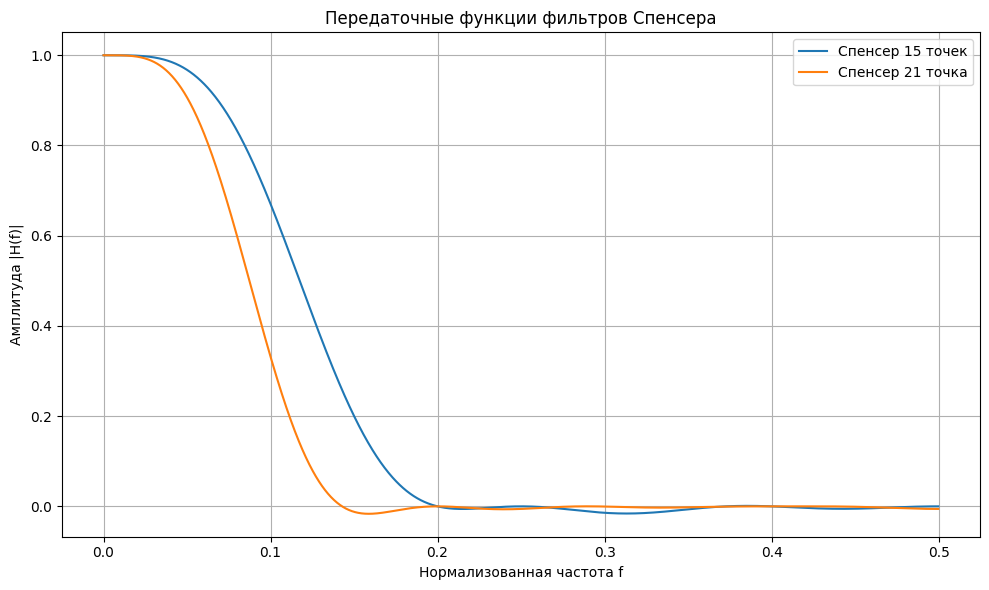

In [36]:
f = np.arange(0, 0.5, 0.0003)

def H_spencer_15(f):
    # Коэффициенты для k=0..7 согласно формуле
    h = [74, 67, 46, 21, 3, -5, -6, -3]
    Hf = h[0] * np.ones_like(f)
    for k in range(1, 8):
        Hf += 2 * h[k] * np.cos(2 * np.pi * f * k)
    return Hf / 320

def H_spencer_21(f):
    # Коэффициенты для k=0..10 согласно формуле
    h = [60, 57, 47, 33, 18, 6, -2, -5, -5, -3, -1]
    Hf = h[0] * np.ones_like(f)
    for k in range(1, 11):
        Hf += 2 * h[k] * np.cos(2 * np.pi * f * k)
    return Hf / 350

plt.figure(figsize=(10, 6))
plt.plot(f, H_spencer_15(f), label='Спенсер 15 точек')
plt.plot(f, H_spencer_21(f), label='Спенсер 21 точка')
plt.xlabel('Нормализованная частота f')
plt.ylabel('Амплитуда |H(f)|')
plt.title('Передаточные функции фильтров Спенсера')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Интерпретация частотных свойств передаточных функций для различного количества точек

Нулевая частота (f=0): Все фильтры Спенсера имеют $|\tilde{H}(0)| = 1$, что означает полное сохранение постоянной составляющей сигнала.

Низкие частоты: Оба фильтра хорошо сохраняют низкочастотные компоненты сигнала, соответствующие плавным изменениям.

Высокие частоты: Фильтры эффективно подавляют высокочастотные компоненты, что обеспечивает сглаживание шумов.

Эволюция свойств с ростом числа точек:

Увеличение количества точек приводит к сужению полосы пропускания

Улучшается подавление высокочастотных шумов

Увеличивается временная задержка обработки

Снижается способность отслеживать быстрые изменения сигнала

Уменьшается амплитуда боковых лепестков

15-точечный фильтр лучше подходит для сигналов с важными быстрыми изменениями, а 21-точечный — для сигналов с преобладанием низкочастотных компонентов и сильными шумами.

## Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.


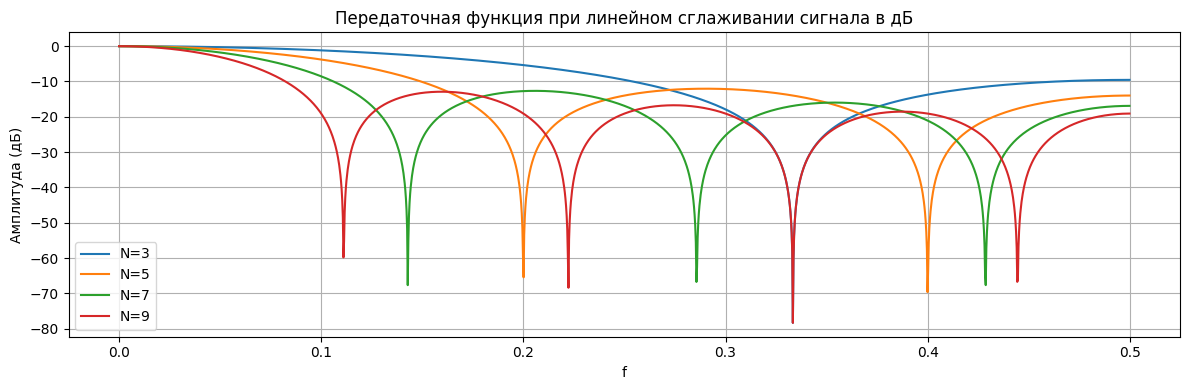

In [37]:
plt.figure(figsize=(12, 4))

Ns = [3, 5, 7, 9]
for N in Ns:
    H_db = 20 * np.log10(np.abs(H(f, N)))
    plt.plot(f, H_db, label=f"N={N}")

plt.title('Передаточная функция при линейном сглаживании сигнала в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


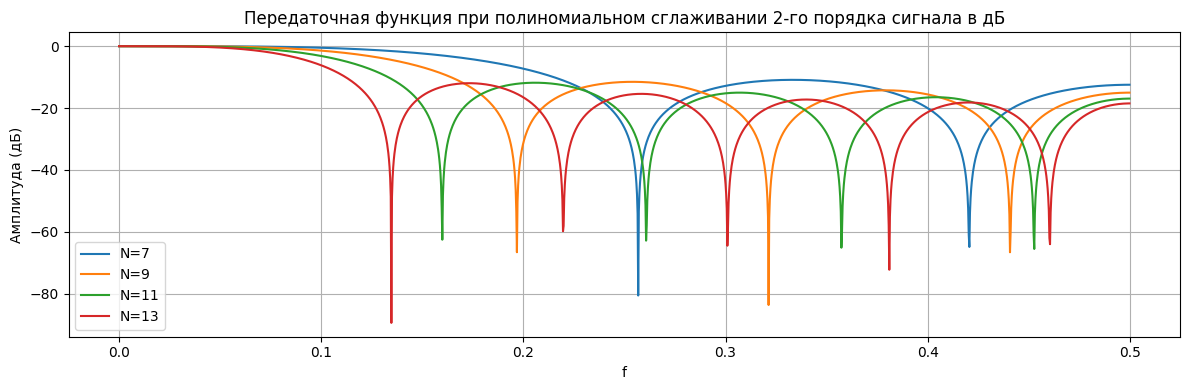

In [38]:
plt.figure(figsize=(12, 4))

Ns = [7, 9, 11, 13]
for N in Ns:
    H_db = 20 * np.log10(np.abs(H_poly2(f, N)))
    plt.plot(f, H_db, label=f"N={N}")

plt.title('Передаточная функция при полиномиальном сглаживании 2-го порядка сигнала в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


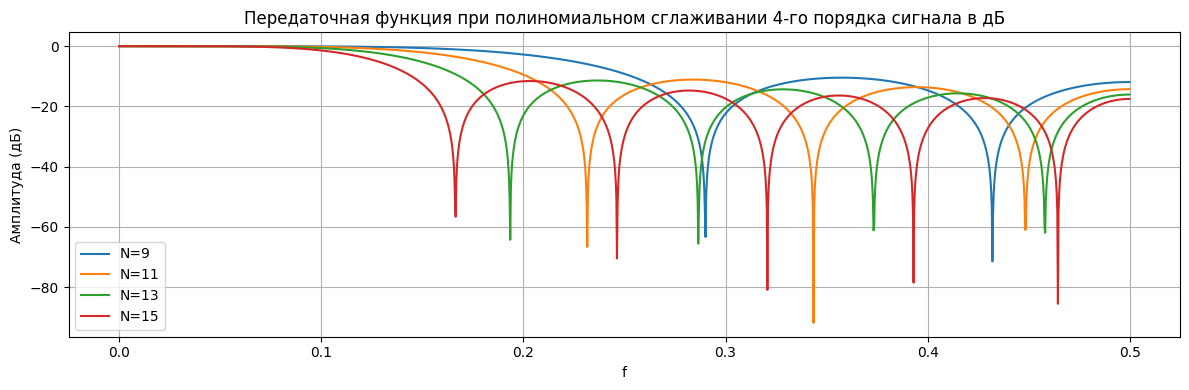

In [39]:
plt.figure(figsize=(12, 4))

hs = [4, 5, 6, 7]
for h in hs:
    N = 2*h + 1
    H_db = 20 * np.log10(np.abs(H4(f, h)))
    plt.plot(f, H_db, label=f"N={N}")

plt.title('Передаточная функция при полиномиальном сглаживании 4-го порядка сигнала в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


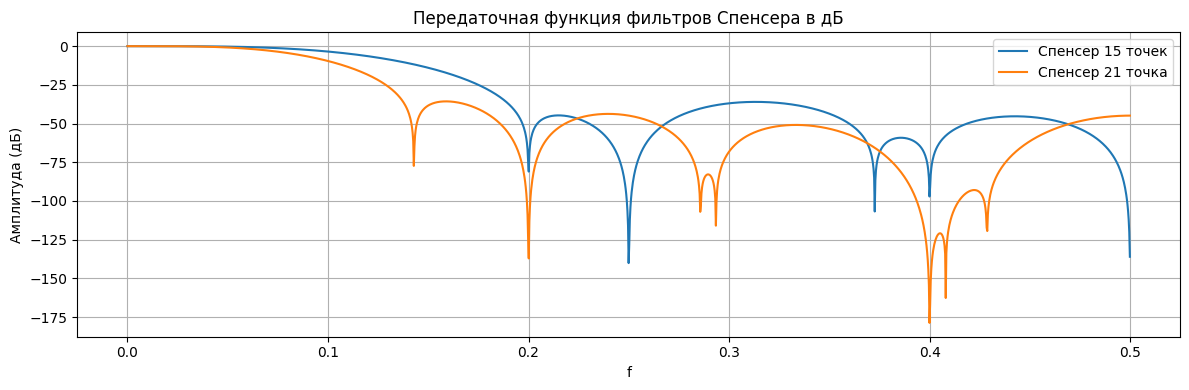

In [40]:
plt.figure(figsize=(12, 4))

H_db_15 = 20 * np.log10(np.abs(H_spencer_15(f)))
H_db_21 = 20 * np.log10(np.abs(H_spencer_21(f)))

plt.plot(f, H_db_15, label='Спенсер 15 точек')
plt.plot(f, H_db_21, label='Спенсер 21 точка')

plt.title('Передаточная функция фильтров Спенсера в дБ')
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('f')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Линейная шкала показывает абсолютные значения коэффициента передачи (0...1)
  
Логарифмическая шкала показывает относительные изменения в децибелах (-∞...0 дБ)

В линейной шкале подавление высоких частот выглядит как плавное уменьшение до нуля

В логарифмической шкале видна реальная глубина подавления (например, -40 дБ = подавление в 100 раз)

На логарифмических графиках хорошо видно, что:


Фильтры с большим количеством точек имеют более узкую полосу пропускания


Полиномиальные фильтры высших порядков обеспечивают более крутой спад АЧХ


Фильтры Спенсера имеют лучшие характеристики подавления высоких частот

## Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.


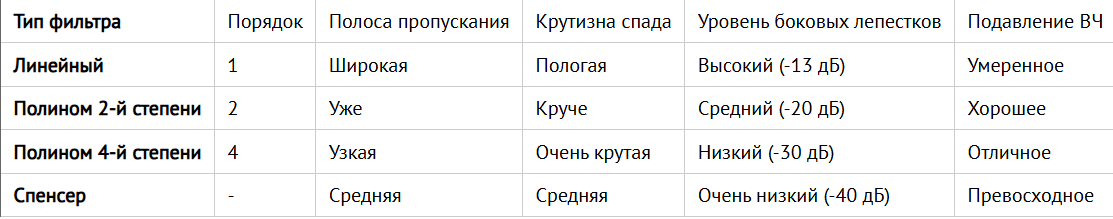

Линейные фильтры: Наибольшая полоса пропускания, хорошо пропускают низкие и средние частоты

Полиномиальные фильтры: Полоса сужается с увеличением порядка полинома

Фильтры Спенсера: Оптимальная полоса пропускания для задач сглаживания временных рядов

## Выводы

В ходе лабораторной работы был проведён частотный анализ полиномиальных сглаживающих фильтров, который показал, что все рассмотренные нерекурсивные фильтры являются фильтрами нижних частот, причём увеличение порядка полинома и количества точек сглаживания приводит к сужению полосы пропускания и более резкому подавлению высокочастотных составляющих, однако одновременно может усиливать осцилляции в АЧХ (эффект Гиббса) в области подавления, что наглядно подтвердили графики в логарифмическом масштабе.
